# Load the data

In [3]:
import warnings
warnings.filterwarnings('ignore')
from Model_test import *
from Load_and_Clean_data import *
import pandas as pd
import pandas_profiling
from sklearn.decomposition import PCA

%pylab
%matplotlib inline

pd.options.display.max_columns = 90

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


## load the initial data

In [82]:
df = load_raw_data()
df = clean_data(df)

# get features and target
X0,y0 = df_featues_target(df)

# save to a file
# save_X_y(X,y)

Loaded data into dataframe


In [84]:
X0.shape, y0.shape

((101766, 81), (101766,))

In [85]:
y0.unique()

array([0, 2, 1])

# Trian Test Split

In [86]:
X0_train, X0_test, y0_train, y0_test = scale_train_test_split(X0,y0)

In [87]:
X0_train.head()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabetesMed,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Male,age_10-20),age_20-30),age_30-40),age_40-50),age_50-60),age_60-70),age_70-80),age_80-90),age_90-100),max_glu_serum_300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_8,A1Cresult_None,A1Cresult_Norm,metformin_No,metformin_Steady,metformin_Up,repaglinide_No,repaglinide_Steady,repaglinide_Up,nateglinide_No,nateglinide_Steady,nateglinide_Up,chlorpropamide_No,chlorpropamide_Steady,chlorpropamide_Up,glimepiride_No,glimepiride_Steady,glimepiride_Up,acetohexamide_Steady,glipizide_No,glipizide_Steady,glipizide_Up,glyburide_No,glyburide_Steady,glyburide_Up,tolbutamide_Steady,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,acarbose_No,acarbose_Steady,acarbose_Up,miglitol_No,miglitol_Steady,miglitol_Up,troglitazone_Steady,tolazamide_Steady,tolazamide_Up,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_Steady,metformin-pioglitazone_Steady
75460,-0.708461,0.432632,0.306482,1.877333,-0.513139,-0.785398,0.612506,1.286748,-0.212620,9.790842,0.298612,1.079225,0.546488,-0.079616,0.580762,-0.142917,-0.196383,-0.927397,-0.082683,-0.128654,-0.196275,-0.324313,2.213013,-0.532521,-0.586829,-0.450942,-0.167988,-0.112147,0.235467,-0.161826,3.374362,-2.231570,-0.227073,0.494386,-0.468960,-0.102937,0.123916,-0.117419,-0.032895,0.083403,-0.081286,-0.015359,0.029082,-0.027873,-0.007679,0.231843,-0.21931,-0.056777,-0.003135,0.377374,-0.354409,-0.087316,0.341883,-0.316651,-0.089684,-0.015035,0.27856,-0.271283,-0.048007,0.258299,-0.252514,-0.041859,0.055098,-0.053919,-0.009913,0.019327,-0.017456,-0.004433,-0.00543,-0.019327,-0.003135,-0.933426,-0.659546,2.827208,0.083582,-0.082743,-0.008867,-0.011303,-0.003135,-0.004433,-0.003135
66313,-0.708461,-0.514312,0.306482,0.537341,0.859212,-0.785398,-0.617881,-0.291461,-0.212620,0.288579,-1.252906,1.079225,0.546488,-0.079616,0.580762,-0.142917,-0.196383,1.078287,-0.082683,-0.128654,-0.196275,3.083438,-0.451873,-0.532521,-0.586829,-0.450942,-0.167988,-0.112147,0.235467,-0.161826,-0.296352,0.448115,-0.227073,-2.022710,2.132379,-0.102937,0.123916,-0.117419,-0.032895,0.083403,-0.081286,-0.015359,0.029082,-0.027873,-0.007679,0.231843,-0.21931,-0.056777,-0.003135,0.377374,-0.354409,-0.087316,0.341883,-0.316651,-0.089684,-0.015035,0.27856,-0.271283,-0.048007,0.258299,-0.252514,-0.041859,0.055098,-0.053919,-0.009913,0.019327,-0.017456,-0.004433,-0.00543,-0.019327,-0.003135,-0.933426,1.516194,-0.353706,0.083582,-0.082743,-0.008867,-0.011303,-0.003135,-0.004433,-0.003135
64853,-0.708461,-0.514312,0.306482,-0.802651,0.096794,-0.785398,-0.494842,-0.291461,1.936836,2.664145,0.815784,1.079225,0.546488,-0.079616,0.580762,-0.142917,-0.196383,-0.927397,-0.082683,-0.128654,-0.196275,-0.324313,-0.451873,-0.532521,-0.586829,2.217580,-0.167988,-0.112147,0.235467,-0.161826,-0.296352,0.448115,-0.227073,0.494386,-0.468960,-0.102937,0.123916,-0.117419,-0.032895,0.083403,-0.081286,-0.015359,0.029082,-0.027873,-0.007679,0.231843,-0.21931,-0.056777,-0.003135,-2.649889,2.821601,-0.087316,0.341883,-0.316651,-0.089684,-0.015035,0.27856,-0.271283,-0.048007,0.258299,-0.252514,-0.041859,0.055098,-0.053919,-0.009913,0.019327,-0.017456,-0.004433,-0.00543,-0.019327,-0.003135,-0.933426,1.516194,-0.353706,0.083582,-0.082743,-0.008867,-0.011303,-0.003135,-0.004433,-0.003135
101193,-0.708461,-0.514312,0.306482,-0.802651,-2.139630,0.387074,0.489467,-0.291461,-0.212620,0.288579,0.815784,1.079225,0.546488,-0.079616,0.580762,-0.142917,-0.196383,-0.927397,-0.082683,-0.128654,-0.196275,-0.324313,-0.451873,1.877859,-0.586829,-0.450942,-0.167988,-0.112147,0.235467,-0.161826,-0.296352,0.448

# Base Model

In [88]:
models, model_names = train_model(X0_train, y0_train)

Running AdaBoost
Running Logistic Regresion
Running DecisionTree_gini


In [90]:
y0_train_predicts = predict_all(X0_train, y0_train, models)
y0_test_predicts = predict_all(X0_test, y0_test, models)

--- Train data ---
Model: AdaBoost
Accuracy: 0.5822152926995441
F1-Score: 0.5822152926995441
Confusion matrix, without normalization
[[35356    99  5693]
 [ 5342   165  3011]
 [17571   171  8916]]
Model: Logistic Regresion
Accuracy: 0.5014936324092029
F1-Score: 0.5014936324092029
Confusion matrix, without normalization
[[33717  6692   739]
 [ 4915  3276   327]
 [16790  8585  1283]]
Model: DecisionTree_gini
Accuracy: 0.5896834547455584
F1-Score: 0.5896834547455584
Confusion matrix, without normalization
[[34171    58  6919]
 [ 4866   247  3405]
 [15985    84 10589]]


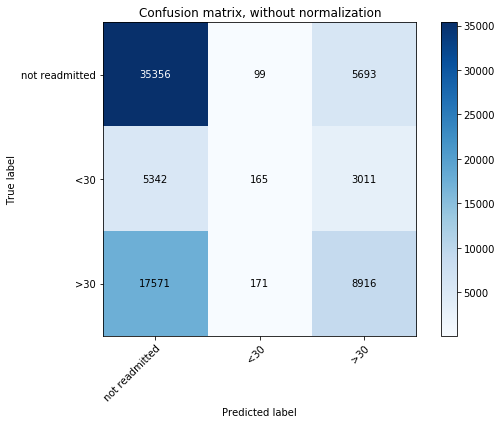

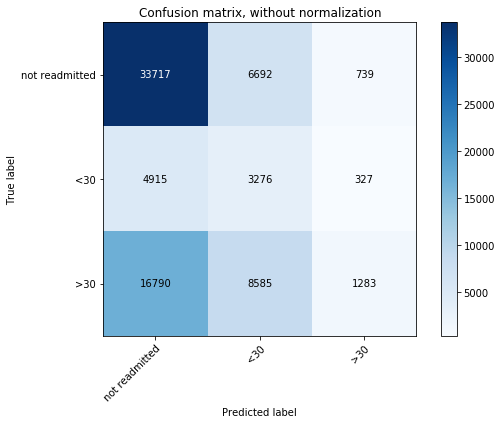

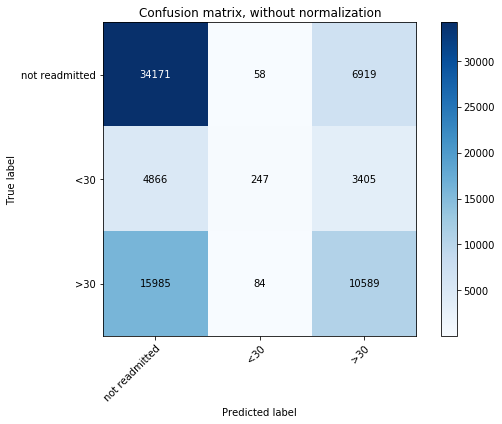

In [100]:
classes = ['not readmitted', '<30','>30']
print('--- Train data ---')
for i,y0_train_pred in enumerate(y0_train_predicts):
    display_acc_and_f1_score(y0_train, y0_train_pred, model_names[i])
    plot_confusion_matrix(y0_train, y0_train_pred,classes=classes)





--- Test data ---
Model: AdaBoost
Accuracy: 0.5793962738778398
F1-Score: 0.5793962738778398
Confusion matrix, without normalization
[[11815    39  1862]
 [ 1708    61  1070]
 [ 5954    68  2865]]
Model: Logistic Regresion
Accuracy: 0.5047166103293766
F1-Score: 0.5047166103293766
Confusion matrix, without normalization
[[11250  2226   240]
 [ 1531  1189   119]
 [ 5727  2758   402]]
Model: DecisionTree_gini
Accuracy: 0.5719676126090716
F1-Score: 0.5719676126090716
Confusion matrix, without normalization
[[11201    41  2474]
 [ 1555    46  1238]
 [ 5537    45  3305]]


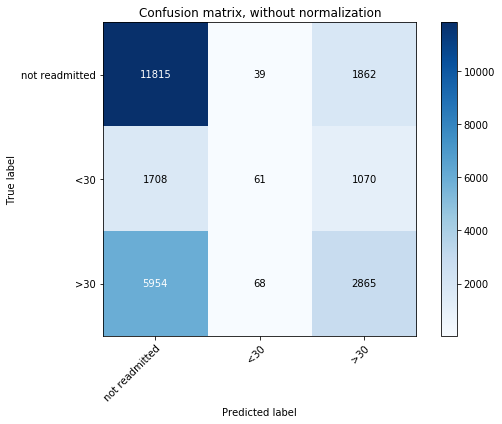

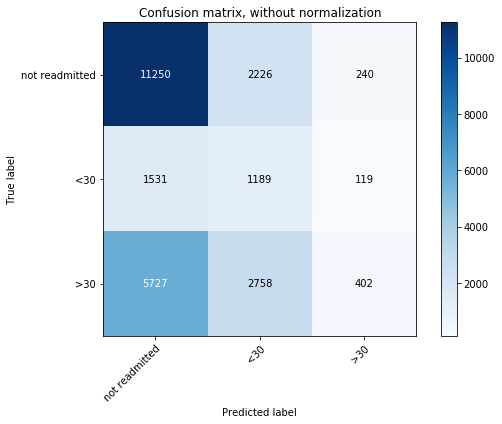

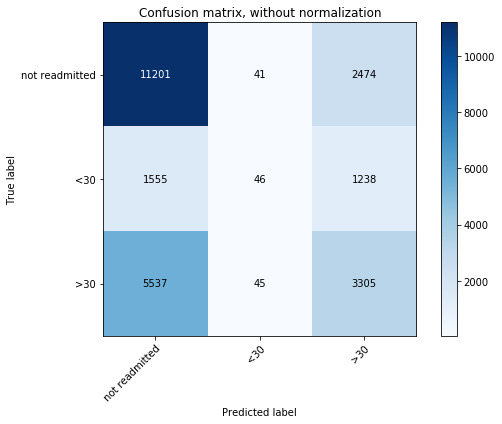

In [102]:
print('\n\n--- Test data ---')
for i,y0_test_pred in enumerate(y0_test_predicts):
    display_acc_and_f1_score(y0_test, y0_test_pred, model_names[i])
    plot_confusion_matrix(y0_test, y0_test_pred,classes=classes)


# Iteration #2, balance the data
Doing a balanced test on the train data

In [103]:
from imblearn.over_sampling import SMOTE
from collections import Counter

sm = SMOTE(random_state=109)
X_sm_train, y_sm_train = sm.fit_sample(X0_train, y0_train)

In [113]:
y0_train.value_counts(normalize=False)

0    41148
2    26658
1     8518
Name: readmitted, dtype: int64

In [112]:
np.unique(y_sm_train,return_counts=True)

(array([0, 1, 2]), array([41148, 41148, 41148]))

In [114]:
models, model_names = train_model(X_sm_train, y_sm_train)

Running AdaBoost
Running Logistic Regresion
Running DecisionTree_gini


In [118]:
y_sm_train_predicts = predict_all(X_sm_train, y_sm_train, models)
y_sm_test_predicts = predict_all(X0_test, y0_test, models)

--- Train data ---
Model: AdaBoost
Accuracy: 0.5643854703347266
F1-Score: 0.5643854703347266
Confusion matrix, without normalization
[[28729  1441 10978]
 [ 6651 25279  9218]
 [14785 10701 15662]]
Model: Logistic Regresion
Accuracy: 0.4438935873756521
F1-Score: 0.4438935873756521
Confusion matrix, without normalization
[[22158 13284  5706]
 [11373 24441  5334]
 [13968 18983  8197]]
Model: DecisionTree_gini
Accuracy: 0.5824665435339101
F1-Score: 0.5824665435339101
Confusion matrix, without normalization
[[33606  1327  6215]
 [ 8652 27778  4718]
 [19046 11584 10518]]


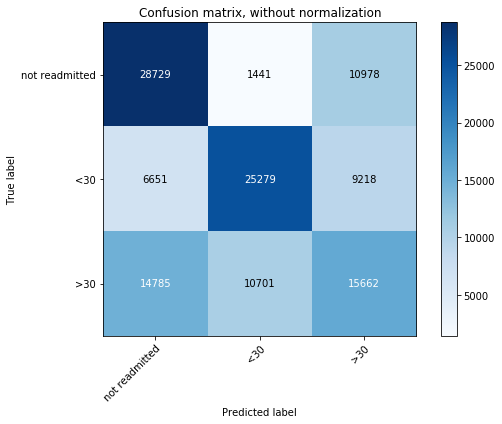

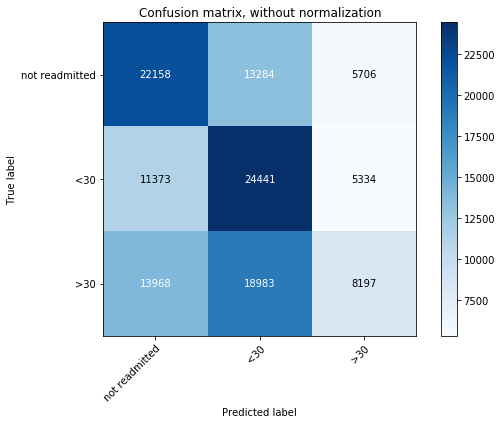

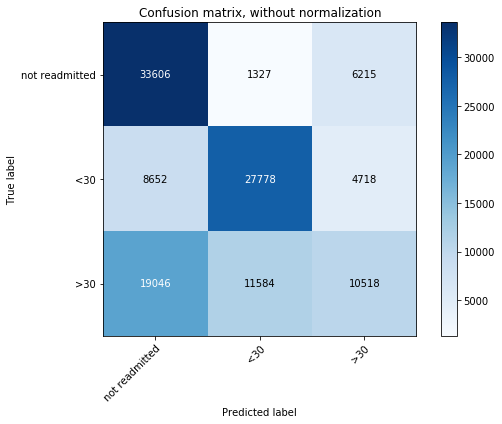

In [119]:

print('--- Train data ---')
for i, y_sm_train_pred in enumerate(y_sm_train_predicts):
    display_acc_and_f1_score(y_sm_train, y_sm_train_pred, model_names[i])
    plot_confusion_matrix(y_sm_train, y_sm_train_pred,classes=classes)



--- Test data ---
Model: AdaBoost
Accuracy: 0.5411131200377329
F1-Score: 0.5411131200377329
Confusion matrix, without normalization
[[9628  452 3636]
 [1239  365 1235]
 [4534  579 3774]]
Model: Logistic Regresion
Accuracy: 0.42213662447920763
F1-Score: 0.42213662447920763
Confusion matrix, without normalization
[[7362 4358 1996]
 [ 826 1615  398]
 [3104 4020 1763]]
Model: DecisionTree_gini
Accuracy: 0.5631239682414905
F1-Score: 0.5631239682414905
Confusion matrix, without normalization
[[11125   485  2106]
 [ 1536   435   868]
 [ 5524   596  2767]]


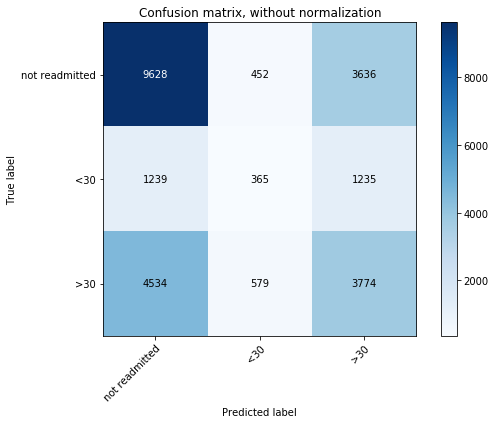

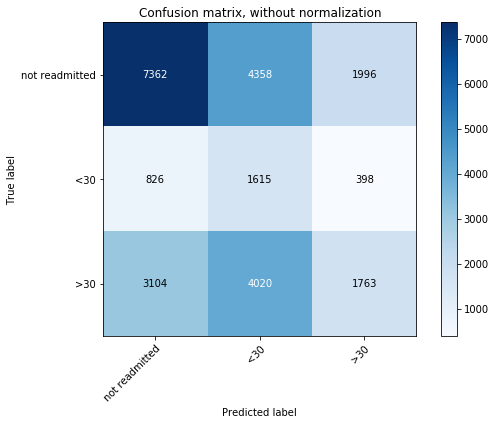

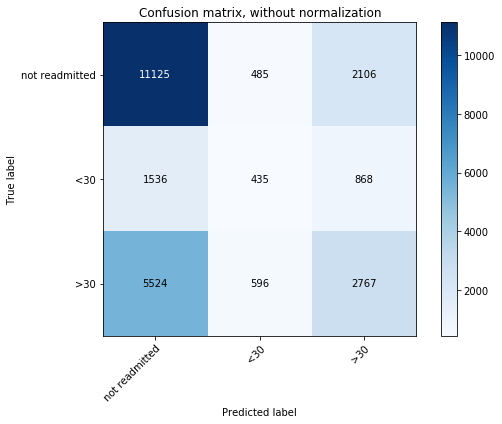

In [121]:
print('\n\n--- Test data ---')
for i,y_sm_test_pred in enumerate(y_sm_test_predicts):
    display_acc_and_f1_score(y0_test, y_sm_test_pred, model_names[i])
    plot_confusion_matrix(y0_test, y_sm_test_pred,classes=classes)

# Iteration #3, get 2 PCA components

In [122]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X0)
print(np.sum(pca.explained_variance_ratio_))

0.8743319127661382


In [123]:
pca_df = pd.DataFrame(principalComponents, columns= ['PCA1','PCA2'])

In [124]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = scale_train_test_split(pca_df,y0)

In [125]:
models, model_names = train_model(X_train_pca, y_train_pca)

Running AdaBoost
Running Logistic Regresion
Running DecisionTree_gini


In [126]:
y_train_pca_predicts = predict_all(X_train_pca, y_train_pca, models)
y_test_pca_predicts = predict_all(X_test_pca, y_test_pca, models)

--- Train data ---
Model: AdaBoost
Accuracy: 0.5390833813741418
F1-Score: 0.5390833813741418
Confusion matrix, without normalization
[[41128     2    18]
 [ 8506     5     7]
 [26644     2    12]]
Model: Logistic Regresion
Accuracy: 0.42175462501965305
F1-Score: 0.42175462501965305
Confusion matrix, without normalization
[[21666  8165 11317]
 [ 3764  2067  2687]
 [12616  5585  8457]]
Model: DecisionTree_gini
Accuracy: 0.542581625700959
F1-Score: 0.542581625700959
Confusion matrix, without normalization
[[40998     5   145]
 [ 8418    38    62]
 [26271    11   376]]


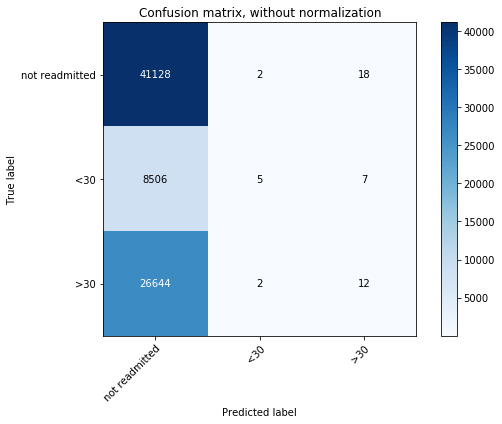

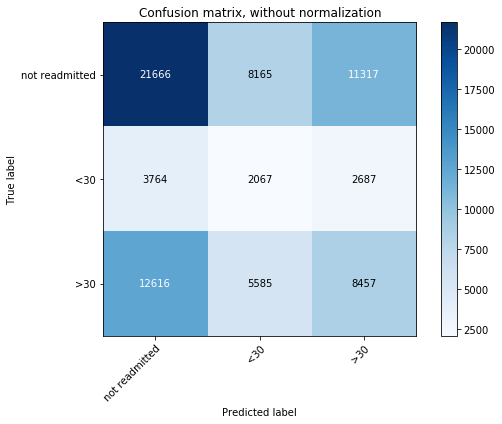

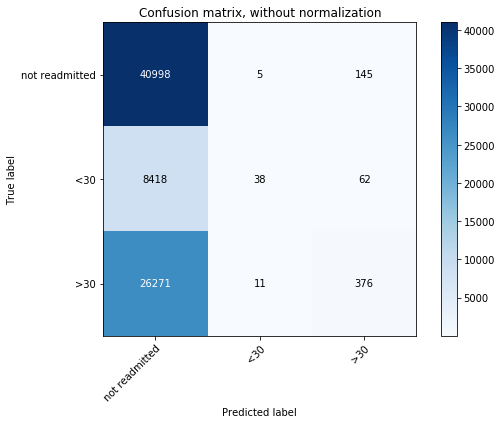

In [129]:
print('--- Train data ---')
for i, y_new_train_pred in enumerate(y_train_pca_predicts):
    display_acc_and_f1_score(y_train_pca, y_new_train_pred, model_names[i])
    plot_confusion_matrix(y_train_pca, y_new_train_pred,classes=classes)




--- Test data ---
Model: AdaBoost
Accuracy: 0.5385189843565757
F1-Score: 0.5385189843565757
Confusion matrix, without normalization
[[13697     5    14]
 [ 2838     0     1]
 [ 8882     1     4]]
Model: Logistic Regresion
Accuracy: 0.4180882006131593
F1-Score: 0.4180882006131593
Confusion matrix, without normalization
[[7130 2808 3778]
 [1280  653  906]
 [4165 1868 2854]]
Model: DecisionTree_gini
Accuracy: 0.5369074758273721
F1-Score: 0.5369074758273721
Confusion matrix, without normalization
[[13596    15   105]
 [ 2816     2    21]
 [ 8819     6    62]]


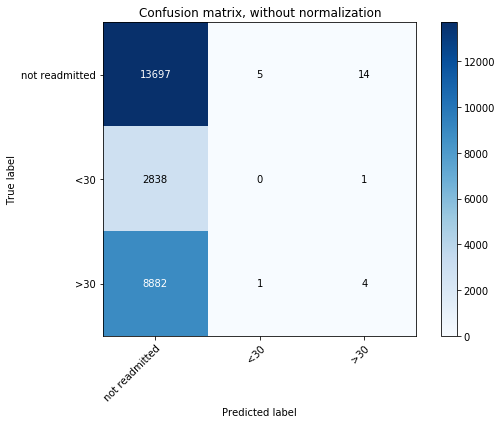

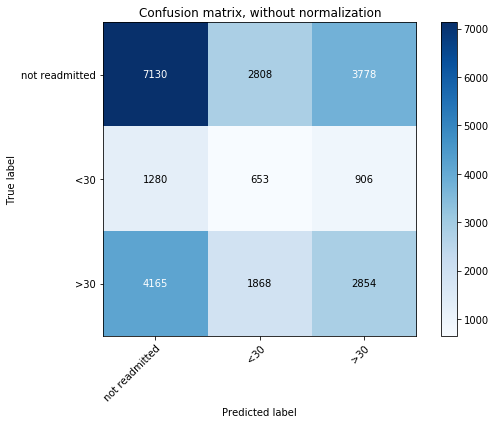

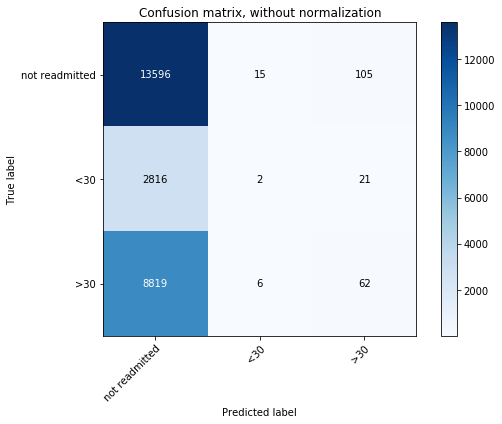

In [130]:
print('\n\n--- Test data ---')
for i,y_new_test_pred in enumerate(y_test_pca_predicts):
    display_acc_and_f1_score(y_test_pca, y_new_test_pred, model_names[i])
    plot_confusion_matrix(y_test_pca, y_new_test_pred,classes=classes)

# Let's drop the data with readmittance >30

In [138]:
df_reduced = df[df.readmitted<2]
classes=['no readmittance', 'readmittance']

In [132]:
df.shape, df_reduced.shape

((101766, 40), (66221, 40))

In [133]:
df_reduced.readmitted.value_counts()

0    54864
1    11357
Name: readmitted, dtype: int64

In [134]:
X,y = df_featues_target(df_reduced)

In [135]:
X_train, X_test, y_train, y_test = scale_train_test_split(X,y)

In [136]:
models, model_names = train_model(X_train, y_train)

Running AdaBoost
Running Logistic Regresion
Running DecisionTree_gini


In [137]:
y_train_predicts = predict_all(X_train, y_train, models)
y_test_predicts = predict_all(np.array(X_test), np.array(y_test), models)

--- Train data ---
Model: AdaBoost
Accuracy: 0.8332427262659821
F1-Score: 0.8332427262659821
Confusion matrix, without normalization
[[40544   603]
 [ 7679   839]]
Model: Logistic Regresion
Accuracy: 0.8132890365448505
F1-Score: 0.8132890365448506
Confusion matrix, without normalization
[[38278  2869]
 [ 6404  2114]]
Model: DecisionTree_gini
Accuracy: 0.8415987113661533
F1-Score: 0.8415987113661533
Confusion matrix, without normalization
[[40715   432]
 [ 7435  1083]]


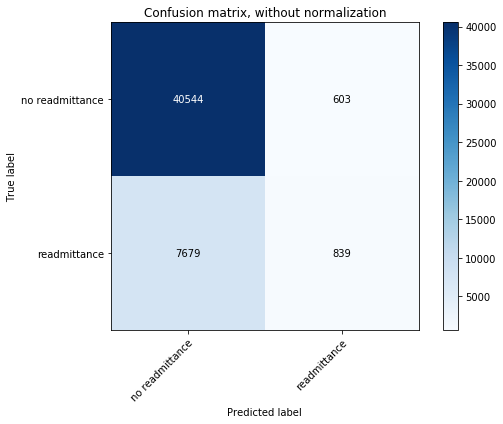

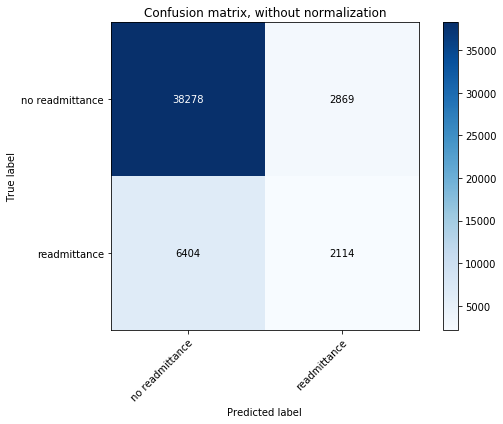

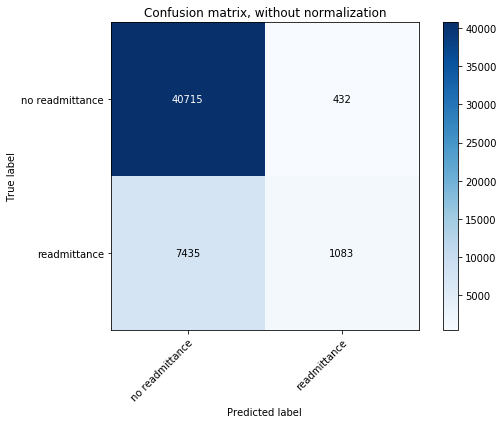

In [139]:
print('--- Train data ---')
for i, y_train_pred in enumerate(y_train_predicts):
    display_acc_and_f1_score(y_train, y_train_pred, model_names[i])
    plot_confusion_matrix(y_train, y_train_pred,classes)



--- Test data ---
Model: AdaBoost
Accuracy: 0.8362527180478376
F1-Score: 0.8362527180478376
Confusion matrix, without normalization
[[13533   184]
 [ 2527   312]]
Model: Logistic Regresion
Accuracy: 0.8165619714906982
F1-Score: 0.8165619714906981
Confusion matrix, without normalization
[[12767   950]
 [ 2087   752]]
Model: DecisionTree_gini
Accuracy: 0.8356487074172505
F1-Score: 0.8356487074172505
Confusion matrix, without normalization
[[13493   224]
 [ 2497   342]]


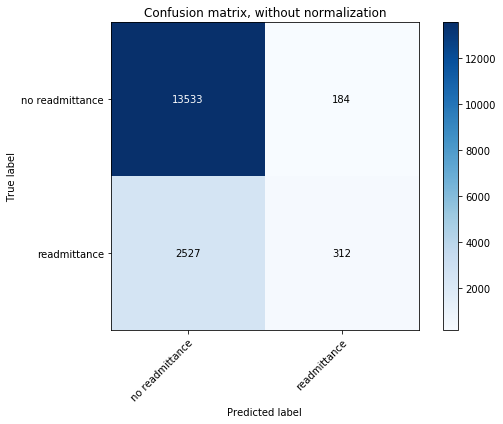

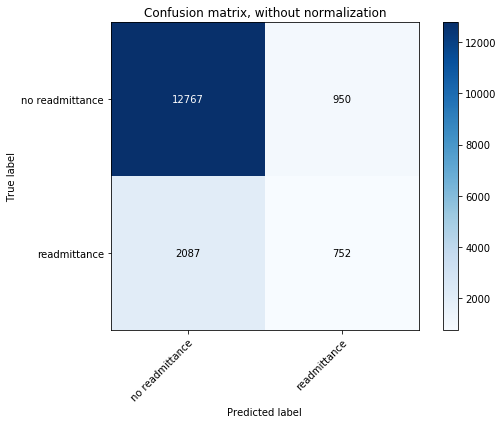

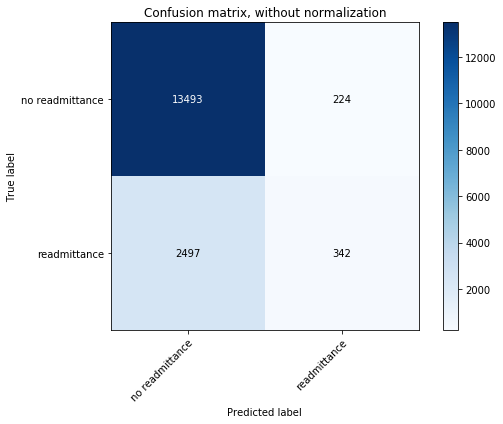

In [140]:
print('\n\n--- Test data ---')
for i,y_test_pred in enumerate(y_test_predicts):
    display_acc_and_f1_score(y_test, y_test_pred, model_names[i])
    plot_confusion_matrix(y_test, y_test_pred,classes)

In [141]:
sm = SMOTE(random_state=109)
X_sm_train, y_sm_train = sm.fit_sample(X_train, y_train)

In [142]:
models, model_names = train_model(X_new_train, y_new_train)

Running AdaBoost
Running Logistic Regresion
Running DecisionTree_gini


In [143]:
y_new_train_predicts = predict_all(X_new_train, y_new_train, models)
y_new_test_predicts = predict_all(np.array(X_test), np.array(y_test), models)

--- Train data ---
Model: AdaBoost
Accuracy: 0.8441441660388364
F1-Score: 0.8441441660388364
Confusion matrix, without normalization
[[37460  3687]
 [ 9139 32008]]
Model: Logistic Regresion
Accuracy: 0.640860816098379
F1-Score: 0.640860816098379
Confusion matrix, without normalization
[[28123 13024]
 [16531 24616]]
Model: DecisionTree_gini
Accuracy: 0.8206916664641407
F1-Score: 0.8206916664641407
Confusion matrix, without normalization
[[37754  3393]
 [11363 29784]]


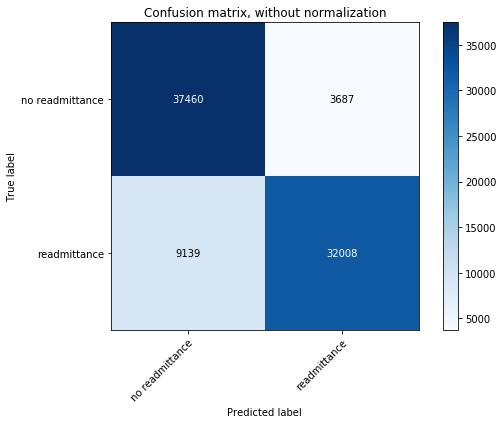

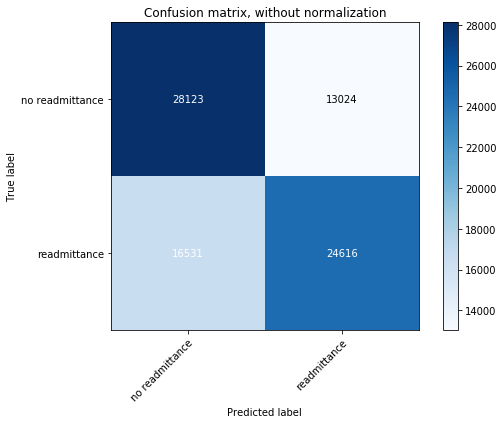

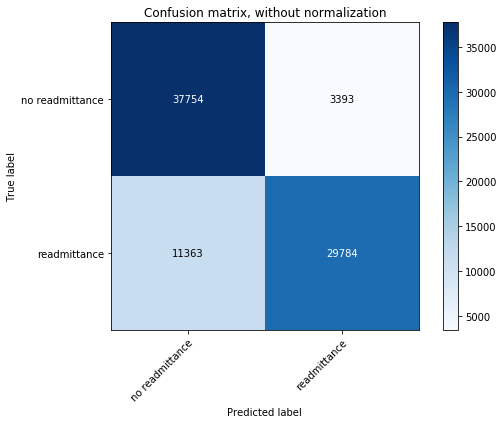

In [144]:
print('--- Train data ---')
for i, y_new_train_pred in enumerate(y_new_train_predicts):
    display_acc_and_f1_score(y_new_train, y_new_train_pred, model_names[i])
    plot_confusion_matrix(y_new_train, y_new_train_pred,classes)
    



--- Test data ---
Model: AdaBoost
Accuracy: 0.8054481758878956
F1-Score: 0.8054481758878957
Confusion matrix, without normalization
[[12504  1213]
 [ 2008   831]]
Model: Logistic Regresion
Accuracy: 0.6689417733752114
F1-Score: 0.6689417733752114
Confusion matrix, without normalization
[[9407 4310]
 [1171 1668]]
Model: DecisionTree_gini
Accuracy: 0.809736651365064
F1-Score: 0.809736651365064
Confusion matrix, without normalization
[[12564  1153]
 [ 1997   842]]


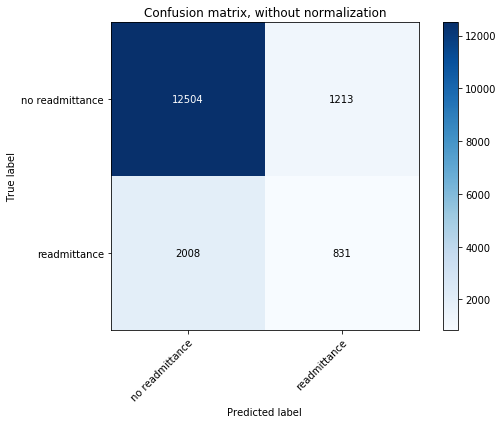

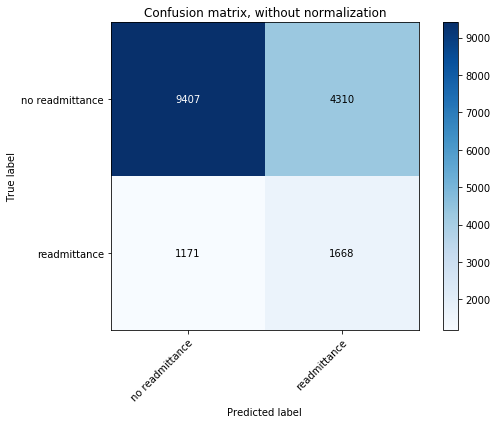

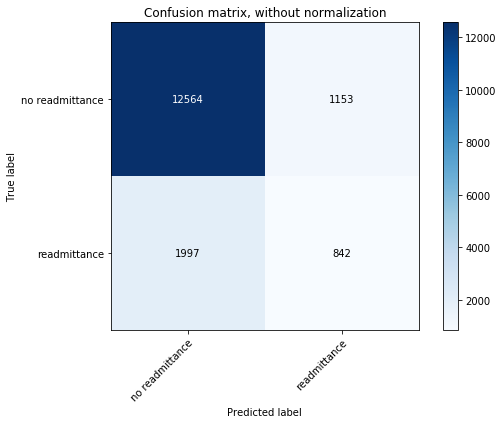

In [145]:
print('\n\n--- Test data ---')
for i,y_new_test_pred in enumerate(y_new_test_predicts):
    display_acc_and_f1_score(y_test, y_new_test_pred, model_names[i])
    plot_confusion_matrix(y_test, y_new_test_pred,classes)

In [96]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
#     classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(8,6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

# Let's do some data engineering

In [4]:
df_raw = load_raw_data()

Loaded data into dataframe


In [5]:
df = clean_eng_data(df_raw)

In [6]:
meds_cols =['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']


,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,?,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,0,0
1,Caucasian,Female,[10-20),1,1,7,3,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,1,1,0
2,AfricanAmerican,Female,[20-30),1,1,7,2,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,1,0
3,Caucasian,Male,[30-40),1,1,7,2,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,1,1,0
4,Caucasian,Male,[40-50),1,1,7,1,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,1,1,0


In [ ]:
df = count_meds(df, meds_cols)

In [ ]:
df = get_diagnosis(df, 'diag_1')
df = get_diagnosis(df, 'diag_2')
df = get_diagnosis(df, 'diag_3')
df.drop(columns = ['diag_1', 'diag_2', 'diag_3'], inplace=True)

In [ ]:
df.head()

In [ ]:
df = get_visits(df)

In [ ]:
df = get_admissions(df)

In [ ]:
df = get_procedures(df)

In [ ]:
df = get_LAE_index(df)
df = get_LAMA_index(df)
df = get_glu_serum(df)
df = get_A1Cresult(df)

In [ ]:
dummy_df = pd.get_dummies(df)
cleaned_df = get_age_bin(dummy_df)

In [ ]:
diagnosis_df = get_diagnosis(cleaned_df)

In [ ]:
diagnosis_df = remove_patients(diagnosis_df)

# Test split the data

In [ ]:
X = diagnosis_df.drop('readmitted',axis=1)
y = diagnosis_df['readmitted']

In [ ]:
X_train, X_test, y_train, y_test = scale_train_test_split(X,y)

In [ ]:
models, model_names = train_model(X_train, y_train)

In [ ]:
y_train_predicts = predict_all(X_train, y_train, models)
y_test_predicts = predict_all(X_test, y_test, models)

In [ ]:
print('--- Train data ---')
classes = ['Not readmitted','readmitted']
for i,y_train_pred in enumerate(y_train_predicts):
    display_acc_and_f1_score(y_train, y_train_pred, model_names[i])
    plot_confusion_matrix(y_train, y_train_pred)

In [ ]:
print('\n\n--- Test data ---')
for i,y_test_pred in enumerate(y_test_predicts):
    display_acc_and_f1_score(y_test, y_test_pred, model_names[i])
    plot_confusion_matrix(y_test, y_test_pred)